### Metadata

1. Opportunity ID: Unique identifier for each sales opportunity.
2. Technology Primary: Main technology or cloud solution offered.
3. Country: Location of the sales opportunity.
4. B2B Sales Medium: Channel or method of the sales process.
5. Sales Velocity: Speed of the sales process from start to finish.(Age)
6. Opportunity Status: Current stage of the sales opportunity.)Target variable)
7. Sales Stage Iterations: Number of stage changes in the sales process.
8. Opportunity Size (USD): Estimated value of the sales opportunity in dollars.
9. Client Revenue Sizing: Category of client's revenue size.
10. Client Employee Sizing: Size of the client's workforce.
11. Business from Client Last Year: Last year's business volume with the client.
12. Compete Intel: Information about competitors and market.
13. Opportunity Sizing: Estimated size or potential of the opportunity.

#### Set-up

In [ ]:
#importing all necessary libraries

# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#----regular expressions----
import re

#----model and support imports----
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint

# Feature Engineering
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# Deployment
from flask import Flask, render_template, request
import pickle

# Set the default style for plotting
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

# Set visualisation styles
sns.set(style="whitegrid")

In [ ]:
#Loading dataset
df = pd.read_csv('data/saas_pipeline_12K.csv')

# Display the first few rows of the dataset to get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  12000 non-null  object
 1   Technology
Primary              12000 non-null  object
 2   Country                         12000 non-null  object
 3   B2B Sales Medium                12000 non-null  object
 4   Sales Velocity                  12000 non-null  int64 
 5   Opportunity Status              12000 non-null  object
 6   Sales Stage Iterations          12000 non-null  int64 
 7   Opportunity Size (USD)          12000 non-null  int64 
 8   Client Revenue Sizing           12000 non-null  object
 9   Client Employee Sizing          12000 non-null  object
 10  Business from Client Last Year  12000 non-null  object
 11  Compete Intel                   10540 non-null  object
 12  Opportunity Sizing              12000 non-null

In [ ]:
df.describe()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,12000.000000,12000.000000,12000.000000
mean,43.485417,2.965333,30034.899250
std,26.733465,1.513987,21737.832618
min,0.000000,1.000000,0.000000
25%,19.000000,2.000000,13000.000000
50%,43.000000,3.000000,29227.500000
75%,65.000000,3.000000,43123.000000
max,210.000000,23.000000,149401.000000


#### Handling Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Remaining Missing Values:\n", missing_values)

Remaining Missing Values:
 Opportunity ID                       0
Technology\nPrimary                  0
Country                              0
B2B Sales Medium                     0
Sales Velocity                       0
Opportunity Status                   0
Sales Stage Iterations               0
Opportunity Size (USD)               0
Client Revenue Sizing                0
Client Employee Sizing               0
Business from Client Last Year       0
Compete Intel                     1460
Opportunity Sizing                   0
dtype: int64


###### Compete Intel Column
For the "Compete Intel  " column, we can use the mode (most frequent value) to fill missing values.

In [ ]:
df['Compete Intel'].fillna(df['Compete Intel'].mode()[0], inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print("Remaining Missing Values:\n", missing_values)

Remaining Missing Values:
 Opportunity ID                    0
Technology\nPrimary               0
Country                           0
B2B Sales Medium                  0
Sales Velocity                    0
Opportunity Status                0
Sales Stage Iterations            0
Opportunity Size (USD)            0
Client Revenue Sizing             0
Client Employee Sizing            0
Business from Client Last Year    0
Compete Intel                     0
Opportunity Sizing                0
dtype: int64


In [ ]:
#We'll drop the "Opportunity ID" 
df.drop(['Opportunity ID'], axis=1, inplace=True)

In [ ]:
# Display the distribution of opportunities across different stages
stage_distribution = df['Opportunity Status'].value_counts()
print("Opportunity Distribution:\n", stage_distribution)

Opportunity Distribution:
 Opportunity Status
Lost    9237
Won     2763
Name: count, dtype: int64


#### Duplicate Check

In [ ]:
df_dub = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)
df = df_dub

In [ ]:
df.shape

(11884, 12)

#### Data Visualisation

Visualizing the Distribution of Opportunities across Stages:

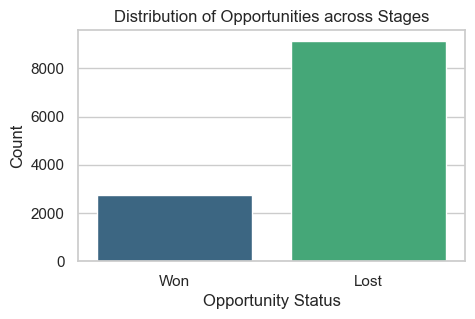

In [ ]:
# Distribution of opportunities across different stages
plt.figure(figsize=(5, 3))
sns.countplot(x='Opportunity Status', data=df, palette='viridis')
plt.title('Distribution of Opportunities across Stages')
plt.xlabel('Opportunity Status')
plt.ylabel('Count')
plt.show()

correlation between numerical columns

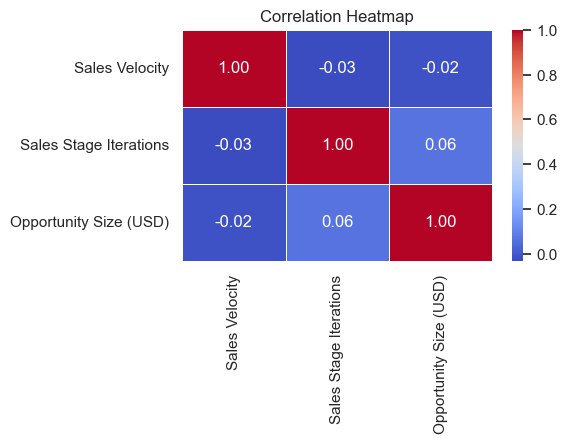

In [ ]:
# Select numerical columns for correlation heatmap
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Distribution of Opportunity Size by Opportunity Status:

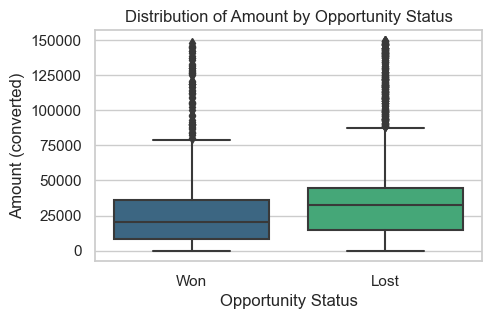

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Opportunity Status', y='Opportunity Size (USD)', data=df, palette='viridis')
plt.title('Distribution of Amount by Opportunity Status')
plt.xlabel('Opportunity Status')
plt.ylabel('Amount (converted)')
plt.show()

Technology\nPrimary
ERP Implementation              7586
Technical Business Solutions    4162
Legacy Modernization             100
Analytics                         36
Name: count, dtype: int64


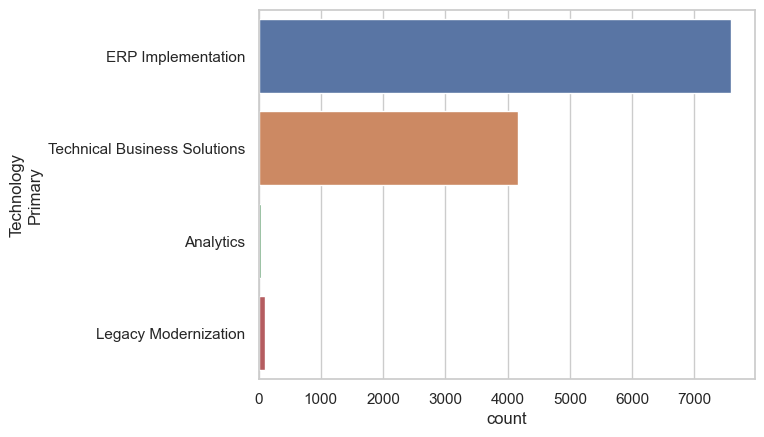

Country
Spain             3229
France            2316
Germany           1503
Sweden            1389
Italy             1258
United Kingdom    1126
Netherlands       1063
Name: count, dtype: int64


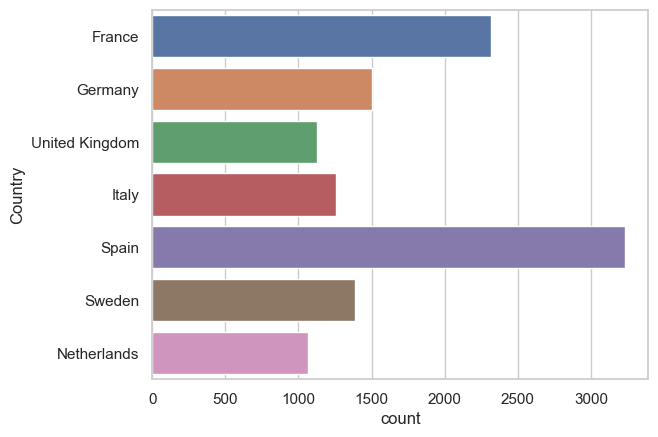

B2B Sales Medium
Marketing             5628
Enterprise Sellers    5354
Partners               447
Tele Sales             350
Online Leads           105
Name: count, dtype: int64


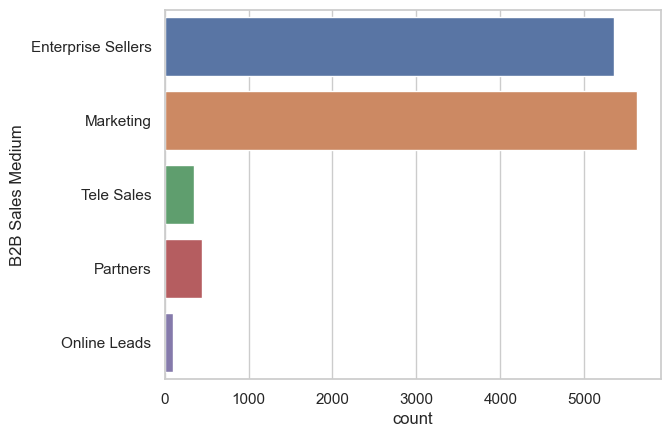

Opportunity Status
Lost    9127
Won     2757
Name: count, dtype: int64


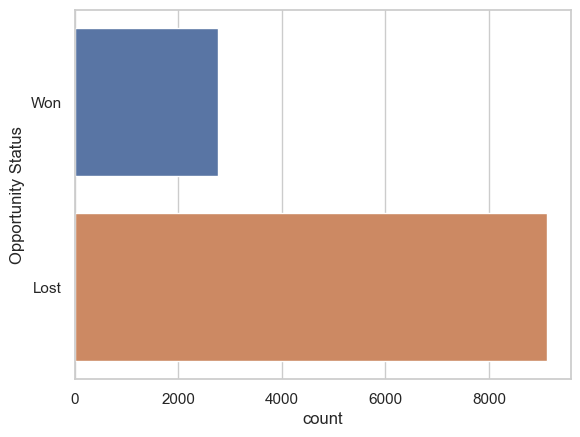

Client Revenue Sizing
100K or less    9114
More than 1M     796
250K to 500K     696
500K to 1M       696
100K to 250K     582
Name: count, dtype: int64


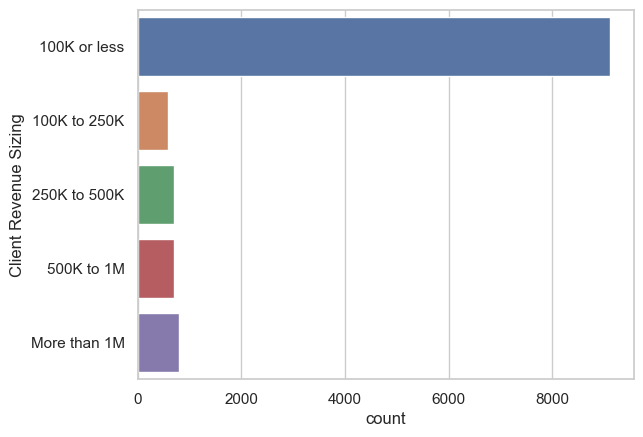

Client Employee Sizing
1K or less       9051
5K to 15K         765
More than 25K     751
1K to 5K          683
15K to 25K        634
Name: count, dtype: int64


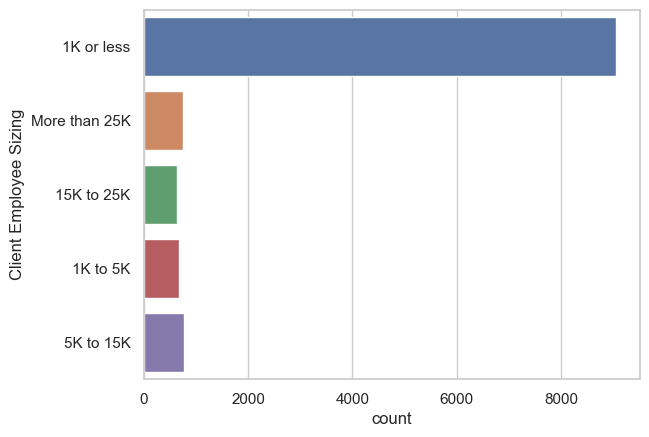

Business from Client Last Year
0 (No business)      10506
More than 100,000      434
25,000 - 50,000        349
50,000 - 100,000       301
0 - 25,000             294
Name: count, dtype: int64


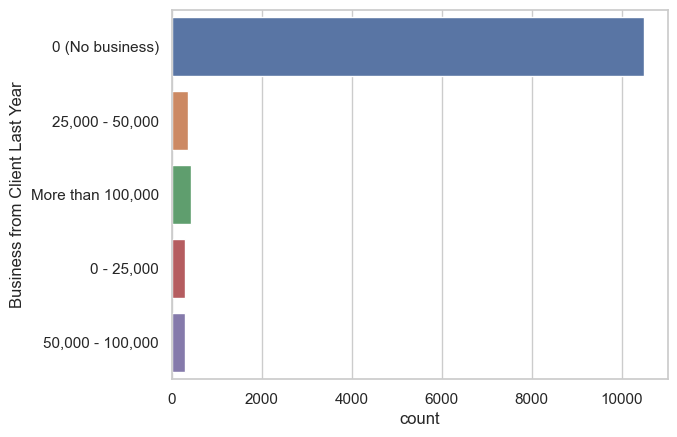

Compete Intel
Unknown    10088
Known       1796
Name: count, dtype: int64


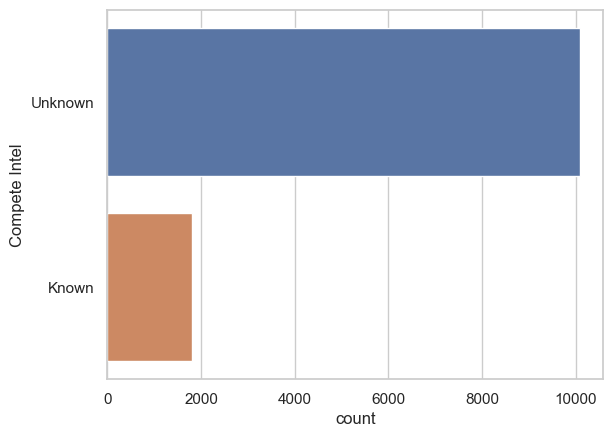

Opportunity Sizing
40K to 50K       2717
10K to 20K       2255
30K to 40K       2044
10K or less      1912
20K to 30K       1835
50K to 60K        737
More than 60K     384
Name: count, dtype: int64


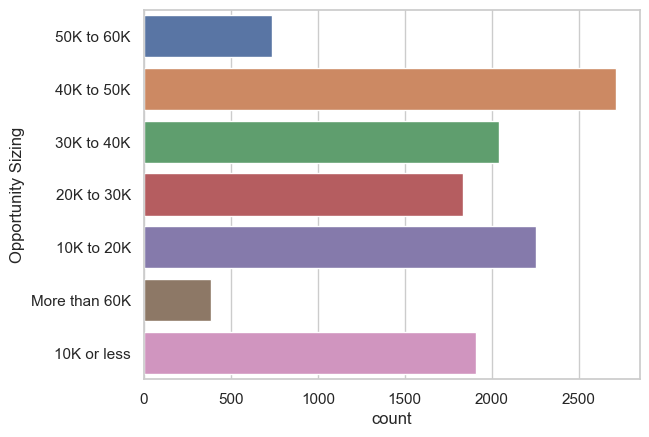

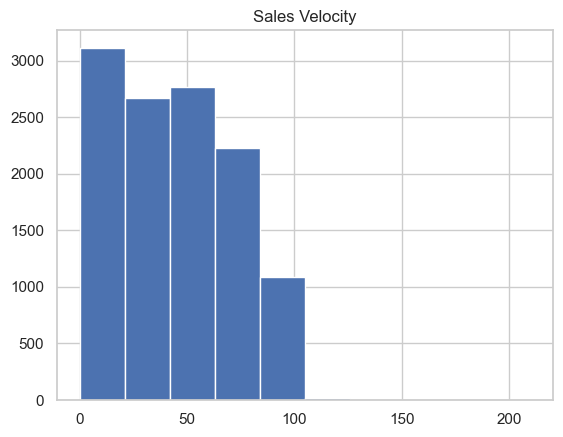

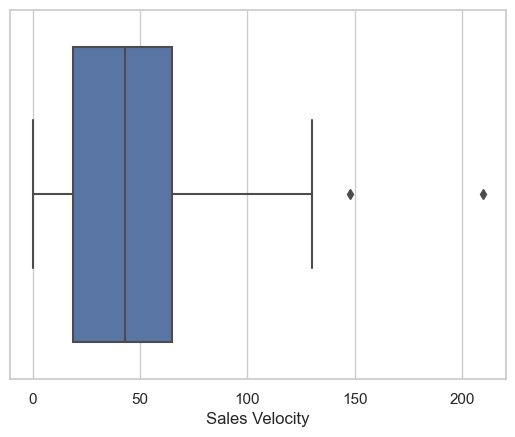

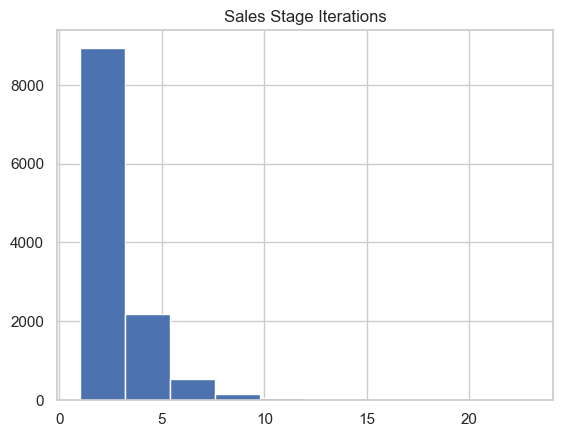

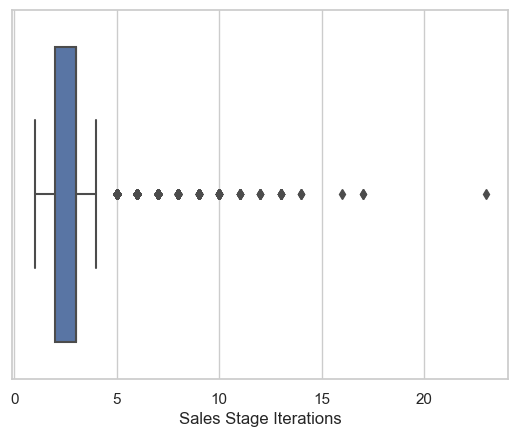

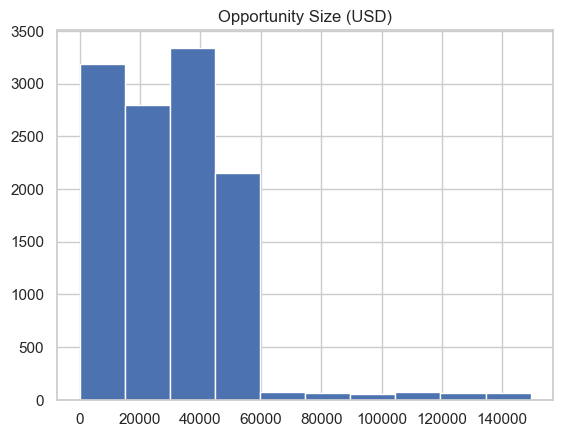

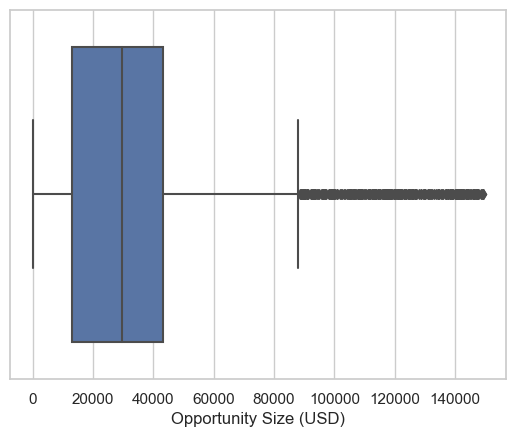

In [ ]:
# For categorical variables: value counts and bar plots
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    sns.countplot(y=col, data=df)
    plt.show()

# For numeric variables: histograms and box plots
for col in df.select_dtypes(include=np.number).columns:
    df[col].hist()
    plt.title(col)
    plt.show()
    sns.boxplot(x=col, data=df)
    plt.show()

##### Outlier Detection

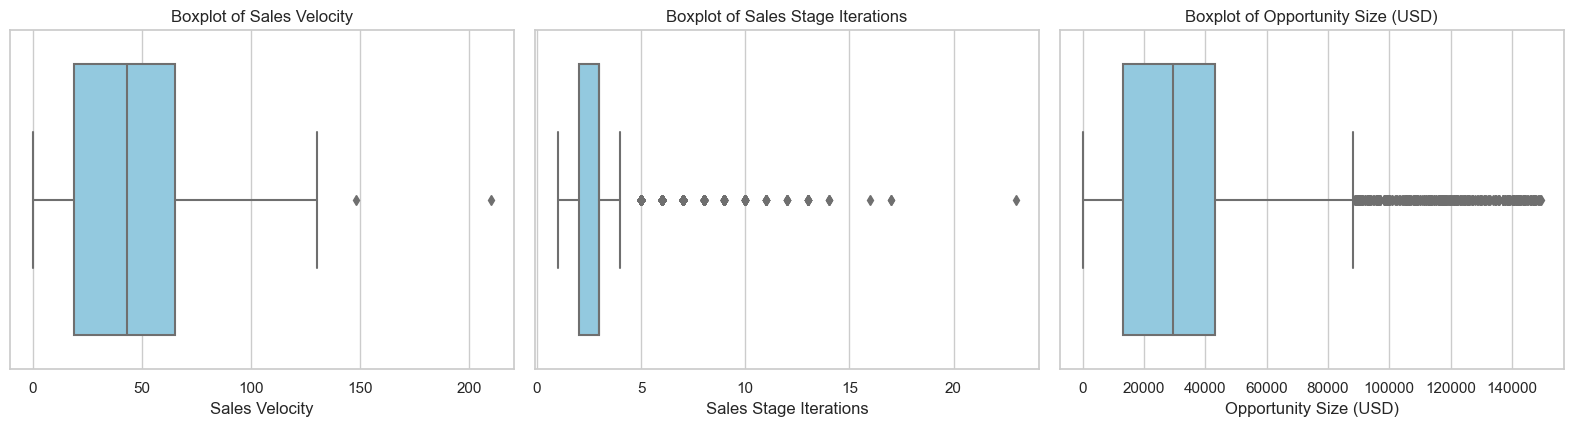

In [ ]:
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for numerical columns to visualize outliers
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Lets move to creating a pair plot for numerical features and color the points based on the "Opportunity_Status"

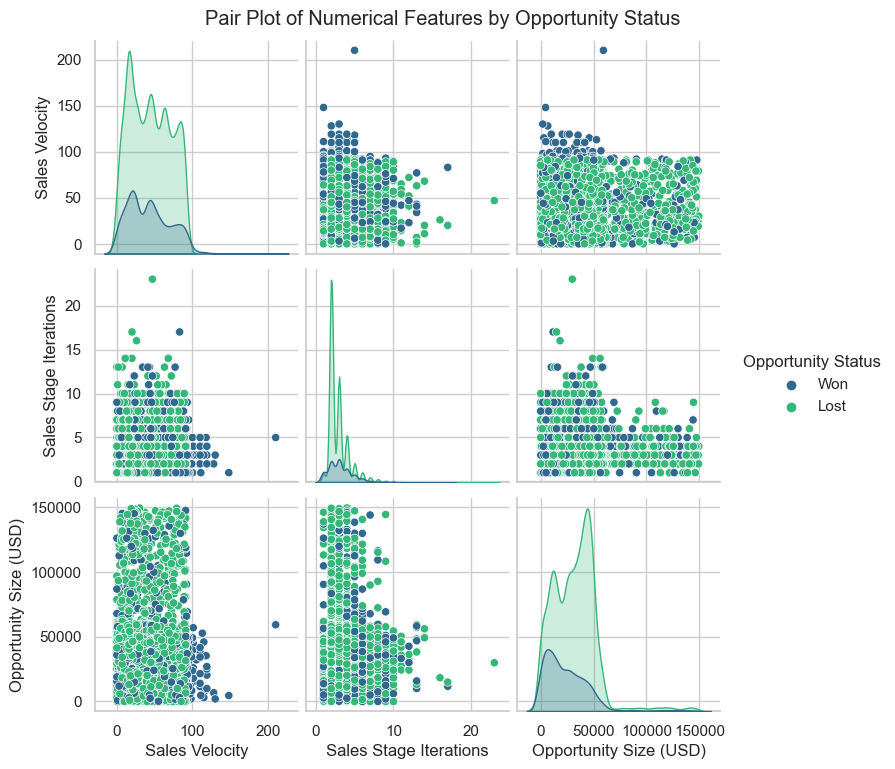

In [ ]:
# Select numerical columns for pair plot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Add the 'Opportunity_Status' column to the selected columns
selected_columns = ['Opportunity Status'] + list(numerical_columns)

# Create a pair plot
pair_plot = sns.pairplot(df[selected_columns], hue='Opportunity Status', palette='viridis')
pair_plot.fig.suptitle('Pair Plot of Numerical Features by Opportunity Status', y=1.02)
plt.show()

Data Distibution

Opportunity Status</br>
Lost    9237</br>
Won     2763

Imbalance in Opportunity Distribution:
The distribution is imbalanced, with "Closed Lost" opportunities being more prevalent. In machine learning models, dealing with imbalanced classes may require special attention during model training to avoid biased results.

Dealing with imbalanced data is an important step, especially when we're working on a classification problem with significantly uneven class distributions. Imbalanced data can lead to biased models, where the algorithm may be more inclined to predict the majority class, and the performance on the minority class could be compromised.

Data Preprocessing and Splitting
Let's define X and y and address the label encoding. We'll use label encoding for the target variable and one-hot encoding for the categorical features.